In [64]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [65]:
import tensorflow as tf


In [38]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define augmentation settings
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0,1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [70]:
save_dir = '/kaggle/working/augmented-images'

# Create the save directory if it doesn't exist
os.makedirs(save_dir, exist_ok=True)

train_generator = train_datagen.flow_from_directory(
    "/kaggle/input/dataset-full/Dataset",
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    '/kaggle/input/dataset/Dataset - Test/Dataset - Test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 2352 images belonging to 4 classes.
Found 480 images belonging to 4 classes.


In [9]:
model = tf.keras.models.load_model("/kaggle/working/98byfar.h5")

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Define a checkpoint callback
checkpoint = ModelCheckpoint('best_model.h5',
                             monitor='val_loss',
                             save_best_only=True,
                             mode='min',
                             verbose=1)

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics='accuracy')

In [ ]:
i = 70 
model.fit_generator(train_generator, epochs=i, validation_data=test_generator,
                   steps_per_epoch=len(train_generator),
                   validation_steps=len(test_generator))


/tmp/ipykernel_32/3486079673.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, epochs=i, validation_data=test_generator,


Epoch 1/70
74/74 [==============================] - 440s 5s/step - loss: 0.5140 - accuracy: 0.8227 - val_loss: 2.0511 - val_accuracy: 0.6750
Epoch 2/70
74/74 [==============================] - 306s 4s/step - loss: 0.4275 - accuracy: 0.8231 - val_loss: 0.8791 - val_accuracy: 0.7854
Epoch 3/70
74/74 [==============================] - 325s 4s/step - loss: 0.3861 - accuracy: 0.8444 - val_loss: 2.0769 - val_accuracy: 0.6333
Epoch 4/70
74/74 [==============================] - 302s 4s/step - loss: 0.4003 - accuracy: 0.8465 - val_loss: 1.2711 - val_accuracy: 0.7354
Epoch 5/70
74/74 [==============================] - 317s 4s/step - loss: 0.3194 - accuracy: 0.8759 - val_loss: 2.2796 - val_accuracy: 0.7125
Epoch 6/70
74/74 [==============================] - 325s 4s/step - loss: 0.3641 - accuracy: 0.8601 - val_loss: 2.4061 - val_accuracy: 0.6354
Epoch 7/70
74/74 [==============================] - 334s 5s/step - loss: 0.3676 - accuracy: 0.8652 - val_loss: 4.8384 - val_accuracy: 0.4042
Epoch 8/70
74

In [26]:
labels

array([0, 0, 0, ..., 3, 3, 3])

In [ ]:
model.save("22nd.h5")

# Testing

In [2]:
import tensorflow as tf

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
model_new = tf.keras.models.load_model("/kaggle/working/24th.h5")

In [4]:
import tensorflow as tf

import os

def process_image(image_path, IMG_SIZE=224):
    
#     if not os.path.exists(image_path) or os.path.getsize(image_path) == 0:
# #         print(f"Invalid image file: {image_path}")
#         return

    image = tf.io.read_file(image_path)
    image = tf.io.decode_image(image, channels=3, expand_animations= False)
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
    return image

In [11]:
images_loc = []
labels = []
for i in os.listdir("/kaggle/input/dataset/Dataset/Dataset/Stage 0 (nofire)"):
    images_loc.append(process_image("/kaggle/input/dataset/Dataset/Dataset/Stage 0 (nofire)"+"/"+i))
    labels.append(0)
for i in os.listdir("/kaggle/input/dataset/Dataset/Dataset/Stage 1 (smoke)"):
    images_loc.append(process_image("/kaggle/input/dataset/Dataset/Dataset/Stage 1 (smoke)"+"/"+i))
    labels.append(1)
for i in os.listdir("/kaggle/input/dataset/Dataset/Dataset/Stage 2 (s+f)"):
    images_loc.append(process_image("/kaggle/input/dataset/Dataset/Dataset/Stage 2 (s+f)"+"/"+i))
    labels.append(2)
for i in os.listdir("/kaggle/input/dataset/Dataset/Dataset/Stage 3 (fire)"):
    images_loc.append(process_image("/kaggle/input/dataset/Dataset/Dataset/Stage 3 (fire)"+"/"+i))
    labels.append(3)

Invalid SOS parameters for sequential JPEG


In [12]:
import numpy as np
images_loc = np.array(images_loc)
labels = np.array(labels)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(images_loc, labels, test_size=0.3, random_state = 114)
y_preds = model_new.predict(X_test)
preds = y_preds.argmax(axis = 1)
print(f"Accuracy", accuracy_score(np.array(preds), np.array(y_test)))

18/18 [==============================] - 0s 16ms/step
Accuracy 0.9697508896797153


In [22]:
preds

array([1, 3, 3, 1, 1, 3, 1, 2, 2, 1, 1, 2, 2, 3, 1, 1, 1, 0, 1, 2, 0, 0,
       3, 1, 2, 2, 2, 1, 1, 0, 3, 1, 2, 1, 2, 1, 1, 2, 2, 3, 1, 0, 3, 3,
       2, 2, 2, 0, 2, 1, 3, 1, 2, 0, 1, 0, 0, 0, 0, 3, 2, 3, 0, 1, 0, 3,
       2, 2, 1, 3, 1, 0, 3, 3, 1, 3, 2, 1, 3, 1, 1, 1, 3, 1, 0, 2, 2, 1,
       1, 3, 3, 1, 1, 0, 3, 0, 3, 1, 2, 3, 1, 0, 2, 1, 3, 0, 1, 3, 1, 3,
       1, 0, 1, 1, 3, 1, 0, 3, 1, 0, 0, 1, 3, 3, 1, 1, 1, 3, 2, 2, 1, 3,
       1, 2, 2, 3, 1, 3, 2, 2, 0, 1, 0, 3, 1, 1, 2, 1, 0, 0, 3, 0, 1, 1,
       3, 2, 3, 2, 0, 2, 0, 0, 0, 3, 2, 2, 2, 3, 1, 3, 3, 3, 1, 3, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 3, 1, 3, 3, 0, 0, 2, 0, 2, 1, 2, 0, 2, 1, 0,
       1, 3, 2, 1, 3, 2, 3, 1, 1, 2, 2, 1, 3, 2, 0, 0, 3, 1, 1, 0, 1, 3,
       1, 0, 1, 2, 1, 3, 1, 1, 0, 1, 0, 1, 0, 3, 2, 0, 2, 1, 1, 1, 3, 0,
       3, 3, 3, 0, 0, 2, 3, 2, 1, 2, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 3, 0,
       3, 0, 0, 3, 1, 1, 3, 3, 2, 1, 2, 0, 1, 3, 2, 3, 0, 1, 1, 2, 3, 1,
       3, 1, 1, 1, 3, 1, 1, 0, 2, 2, 2, 3, 3, 3, 3,

In [24]:
import matplotlib.pyplot as plt
def show_25_images(images, labels):
    plt.figure(figsize=(10,10))
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(images[i])
        plt.title(labels[i])
        plt.axis("off")

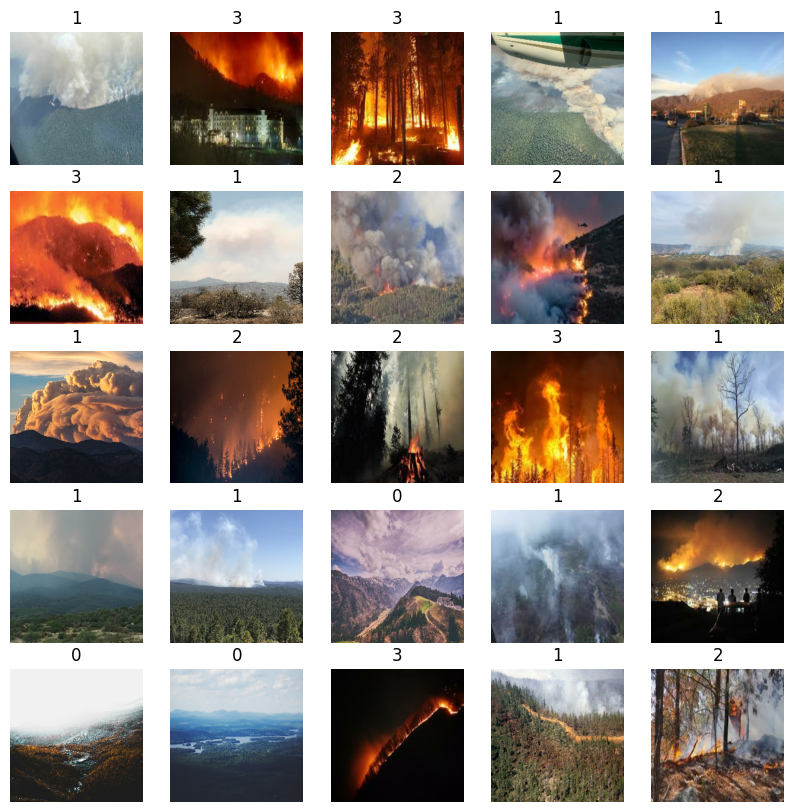

In [25]:
show_25_images(X_test, y_test)

In [78]:
model_new.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [85]:
model_new.save("24th.h5")

In [6]:
images_loc_test = []
labels_test = []
for i in os.listdir("/kaggle/input/dataset/Dataset - Test/Dataset - Test/Stage 0 (nofire)"):
    images_loc_test.append(process_image("/kaggle/input/dataset/Dataset - Test/Dataset - Test/Stage 0 (nofire)"+"/"+i))
    labels_test.append(0)
for i in os.listdir("/kaggle/input/dataset/Dataset - Test/Dataset - Test/Stage 1 (smoke)"):
    images_loc_test.append(process_image("/kaggle/input/dataset/Dataset - Test/Dataset - Test/Stage 1 (smoke)"+"/"+i))
    labels_test.append(1)
for i in os.listdir("/kaggle/input/dataset/Dataset - Test/Dataset - Test/Stage 2 (s+f)"):
    images_loc_test.append(process_image("/kaggle/input/dataset/Dataset - Test/Dataset - Test/Stage 2 (s+f)"+"/"+i))
    labels_test.append(2)
for i in os.listdir("/kaggle/input/dataset/Dataset - Test/Dataset - Test/Stage 3 (fire)"):
    images_loc_test.append(process_image("/kaggle/input/dataset/Dataset - Test/Dataset - Test/Stage 3 (fire)"+"/"+i))
    labels_test.append(3)

In [10]:
import numpy as np
images_loc_test = np.array(images_loc_test)
labels_test = np.array(labels_test)

In [11]:
y_preds = model_new.predict(images_loc_test)

15/15 [==============================] - 6s 15ms/step


In [17]:
accuracy_score(y_preds.argmax(axis = 1), labels_test)

0.9520833333333333